In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Pre_AI_Companies.csv")

In [3]:
def QuanQual(dataset):
    quan=[]
    qual=[]
    for ColumnName in dataset.columns:
        #print(ColumnName)
        if (dataset[ColumnName].dtypes=='O'):
            #print("qual")
            qual.append(ColumnName)
        else:
            #print("quan")
            quan.append(ColumnName)
    return quan,qual

In [4]:
quan,qual=QuanQual(dataset)

In [5]:
quan

['Founded', 'Annual Revenue', 'Glassdoor Score']

In [6]:
qual

['Company Name', 'Description', 'Headquarters']

## Covariance

In [7]:
dataset[quan].cov()

,Founded,Annual Revenue,Glassdoor Score
Founded,112.401824,-2.139490e+05,-0.354227
Annual Revenue,-213948.952453,4.826595e+09,1456.031647
Glassdoor Score,-0.354227,1.456032e+03,0.186649


## Correlation

In [8]:
dataset[quan].corr()

,Founded,Annual Revenue,Glassdoor Score
Founded,1.000000,-0.290471,-0.077336
Annual Revenue,-0.290471,1.000000,0.048511
Glassdoor Score,-0.077336,0.048511,1.000000


## Pair Plot

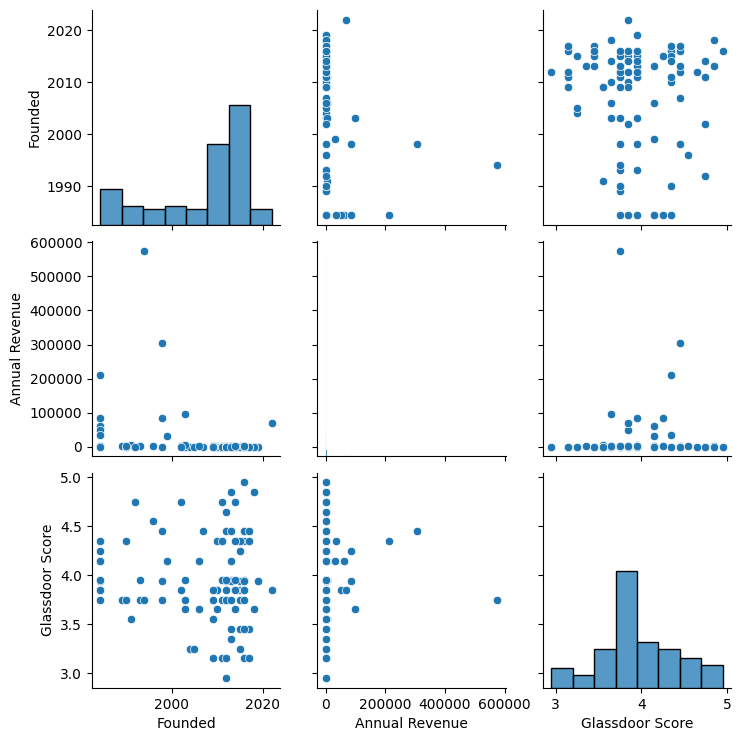

In [9]:
import seaborn as sns
sns.pairplot(dataset)

In [ ]:
## Since we are not find any linear distribution of datapoints, we have not find multicollinearity in this problem statement

## VIF(Variance Inflation Factor)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
def cal_vif(X):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [12]:
cal_vif(dataset[quan])

,variables,VIF
0,Founded,84.535953
1,Annual Revenue,1.060290
2,Glassdoor Score,84.754464


In [13]:
cal_vif(dataset[['Annual Revenue','Glassdoor Score']])

,variables,VIF
0,Annual Revenue,1.058898
1,Glassdoor Score,1.058898


In [14]:
dataset

,Company Name,Description,Headquarters,Founded,Annual Revenue,Glassdoor Score
0,Alibaba Cloud,Best for Big Data Analytics,China,2009.0,479.5,3.75
1,DataRobot,Best for Automated Machine Learning,Massachusetts,2012.0,338.2,3.75
2,Google,Best for AI Development,California,1998.0,305600.0,4.45
3,Hugging Face,Best for Deploying AI Models in the Cloud,New York,2016.0,40.0,4.35
4,H2O.ai,Best for Time Series Forecasting,California,2011.0,69.2,3.15
...,...,...,...,...,...,...
95,Nuro,Best for Driverless Operation,California,2016.0,438.8,3.85
96,Pony.ai,Best for Robotruck Development,California,2016.0,100.0,3.45
97,Tesla,Best for Electric Vehicles,Texas,2003.0,96770.0,3.65
98,Waymo,Best for Experience and Testing,California,2016.0,1400.0,3.75


## ANOVA

In [15]:
import scipy.stats as stats
stats.f_oneway(dataset['Founded'],dataset['Annual Revenue'],dataset['Glassdoor Score'])

F_onewayResult(statistic=5.032711067942354, pvalue=0.007088297501767935)

In [16]:
import scipy.stats as stats
stats.f_oneway(dataset['Founded'],dataset['Annual Revenue'])

F_onewayResult(statistic=4.348272524111044, pvalue=0.038328466053728465)

In [17]:
import scipy.stats as stats
stats.f_oneway(dataset['Founded'],dataset['Glassdoor Score'])

F_onewayResult(statistic=3564501.911586163, pvalue=0.0)

In [18]:
#There is significant different between all the three columns said above
#Reject Null Hypothesis When p<0.05
#Here pvalue is lesser than the specified value. Hence we are rejecting the null hypothesis and accepting the alternate hypothesis.

## Histogram

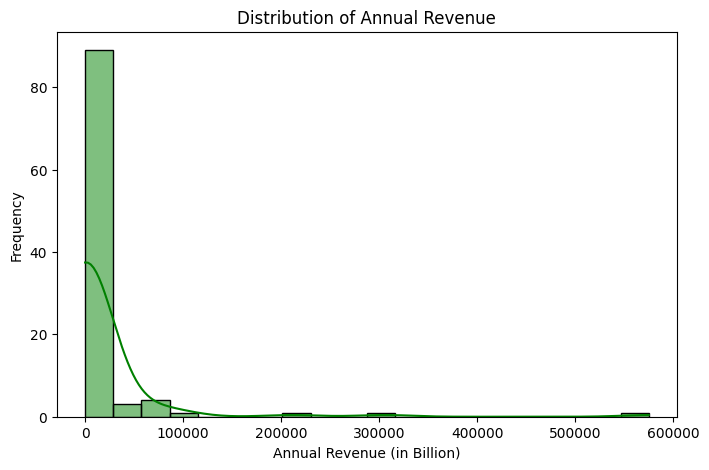

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset["Annual Revenue"], bins=20, kde=True, color="green")
plt.xlabel("Annual Revenue (in Billion)")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Revenue")
plt.show()

## Scatterplot

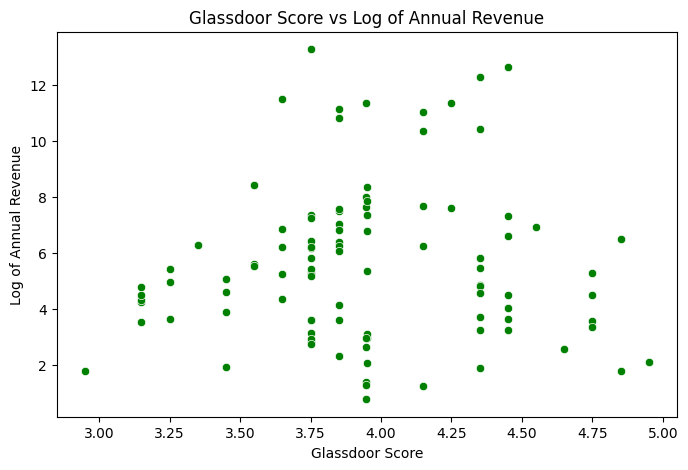

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dataset["Glassdoor Score"], y=np.log1p(dataset["Annual Revenue"]), color="green")
plt.xlabel("Glassdoor Score")
plt.ylabel("Log of Annual Revenue")
plt.title("Glassdoor Score vs Log of Annual Revenue")
plt.show()

## Hypothesis Testing

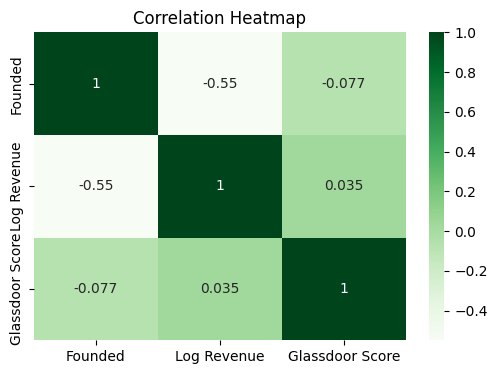

In [22]:
dataset["Log Revenue"] = np.log1p(dataset["Annual Revenue"])
plt.figure(figsize=(6, 4))
sns.heatmap(dataset[["Founded", "Log Revenue", "Glassdoor Score"]].corr(), 
            annot=True, cmap="Greens")
plt.title("Correlation Heatmap")
plt.show()